In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.44272026 0.18971182]
Total explained variance: 0.6324320765155944


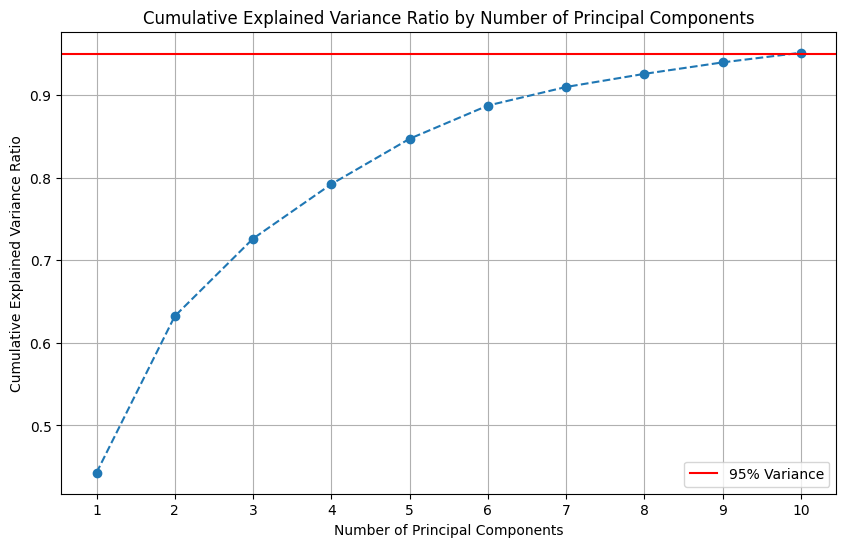

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# We need at least 10 components for the plot, so we take min(10, number of features)
n_components_for_plot = min(10, X_scaled.shape[1])
pca_plot = PCA(n_components=n_components_for_plot)
pca_plot.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca_plot.explained_variance_ratio_)

# Create the variance ratio plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components_for_plot + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, n_components_for_plot + 1))
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance') # Optional: Add a line for 95% variance
plt.legend()
plt.show()

In [8]:
def biplot(score, coeff, labels=None, feature_names=None, xlim=None, ylim=None):
    """
    Generates a biplot for PCA results.

    Args:
        score (numpy.ndarray): PCA transformed data.
        coeff (numpy.ndarray): PCA loadings (components_).
        labels (numpy.ndarray, optional): Target labels for coloring. Defaults to None.
        feature_names (list, optional): Names of the original features. Defaults to None.
        xlim (tuple, optional): x-axis limits (min, max). Defaults to None.
        ylim (tuple, optional): y-axis limits (min, max). Defaults to None.
    """
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(10, 8))
    if labels is not None:
        # Scatter plot of data points, colored by labels
        scatter = plt.scatter(xs * scalex, ys * scaley, c=labels, cmap='viridis', s=50, alpha=0.7)
        plt.legend(*scatter.legend_elements(), title="Target")
    else:
        plt.scatter(xs * scalex, ys * scaley, s=50, alpha=0.7)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5, head_width=0.02, head_length=0.02)
        if feature_names is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='g', ha='center', va='center')

    if xlim:
        plt.xlim(xlim)
    else:
        plt.xlim(-1, 1)
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim(-1, 1)

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.show()

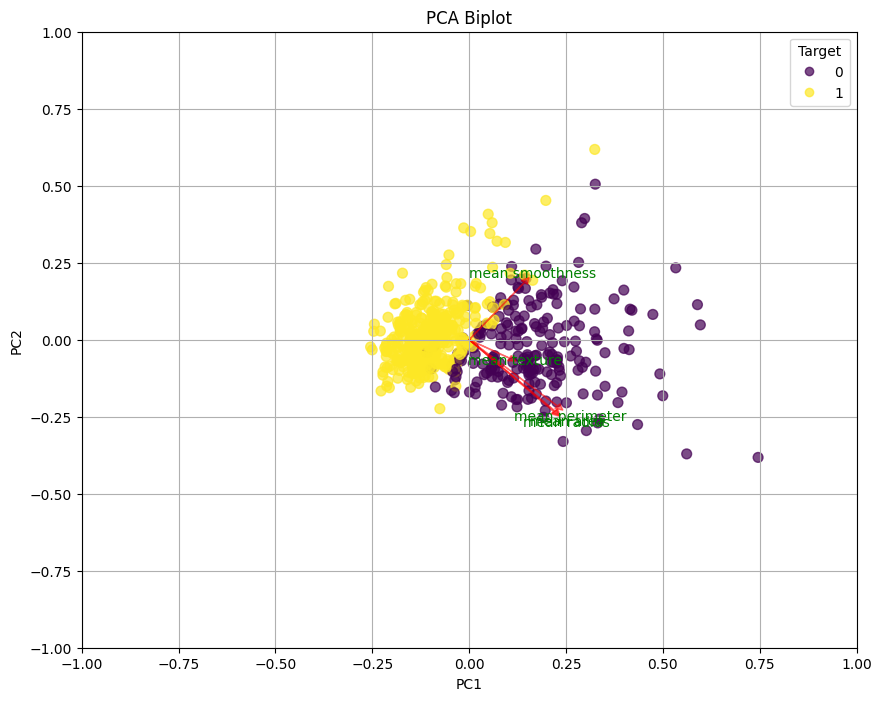

In [9]:
num_features_to_show = 5
selected_feature_names = X.columns.tolist()[:num_features_to_show]
selected_loadings = np.transpose(pca.components_[:2, :num_features_to_show])

biplot(X_pca[:, :2], selected_loadings, labels=y, feature_names=selected_feature_names)

In [15]:
# Get the PCA loadings (components_)
loadings = pca.components_

# Create a DataFrame for the loadings
# Rows are original features, columns are principal components
loadings_df = pd.DataFrame(loadings.T, index=X.columns,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the loadings DataFrame
print("PCA Loadings:")
display(loadings_df)

# You can also sort the loadings to see the most influential features for each PC
print("\nSorted Absolute Loadings for PC1 ASC:")
display(loadings_df['PC1'].abs().sort_values(ascending=False).head())

print("\nSorted Absolute Loadings for PC2 ASC:")
display(loadings_df['PC2'].abs().sort_values(ascending=False).head())

print("\nSorted Absolute Loadings for PC1 DESC:")
display(loadings_df['PC1'].abs().sort_values(ascending=True).head())

print("\nSorted Absolute Loadings for PC2 DESC:")
display(loadings_df['PC2'].abs().sort_values(ascending=True).head())

PCA Loadings:


,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575



Sorted Absolute Loadings for PC1 ASC:


,PC1
mean concave points,0.260854
mean concavity,0.258400
worst concave points,0.250886
mean compactness,0.239285
worst perimeter,0.236640



Sorted Absolute Loadings for PC2 ASC:


,PC2
mean fractal dimension,0.366575
fractal dimension error,0.280092
worst fractal dimension,0.275339
mean radius,0.233857
compactness error,0.232716



Sorted Absolute Loadings for PC1 DESC:


,PC1
smoothness error,0.014531
texture error,0.017428
symmetry error,0.042498
mean fractal dimension,0.064363
fractal dimension error,0.102568



Sorted Absolute Loadings for PC2 DESC:


,PC2
worst concave points,0.008257
mean concave points,0.034768
worst texture,0.045467
mean texture,0.059706
mean concavity,0.060165
